# Topic Modelisation avec Gensim

In [4]:
import nltk
import gensim
import pandas as pd


In [5]:
print(nltk.__version__)

3.9.1


In [6]:
D = pd.read_excel("IMDB-Dataset.xlsx")
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


In [7]:
corpus = D['review'].tolist()
corpus

["One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the f

In [8]:
#Passer le corpus en minuscule
corpus = [doc.lower() for doc in corpus]
corpus[0]

"one of the other reviewers has mentioned that after watching just 1 oz episode you'll be hooked. they are right, as this is exactly what happened with me.<br /><br />the first thing that struck me about oz was its brutality and unflinching scenes of violence, which set in right from the word go. trust me, this is not a show for the faint hearted or timid. this show pulls no punches with regards to drugs, sex or violence. its is hardcore, in the classic use of the word.<br /><br />it is called oz as that is the nickname given to the oswald maximum security state penitentary. it focuses mainly on emerald city, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. em city is home to many..aryans, muslims, gangstas, latinos, christians, italians, irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />i would say the main appeal of the show is due to the fa

In [9]:
import string
ponctuations = list(string.punctuation)
ponctuations

['!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~']

In [10]:
#Retirer la ponctuation
corpus = ["".join([char for char in list(doc) if not (char in ponctuations)]) for doc in corpus]
corpus[0]

'one of the other reviewers has mentioned that after watching just 1 oz episode youll be hooked they are right as this is exactly what happened with mebr br the first thing that struck me about oz was its brutality and unflinching scenes of violence which set in right from the word go trust me this is not a show for the faint hearted or timid this show pulls no punches with regards to drugs sex or violence its is hardcore in the classic use of the wordbr br it is called oz as that is the nickname given to the oswald maximum security state penitentary it focuses mainly on emerald city an experimental section of the prison where all the cells have glass fronts and face inwards so privacy is not high on the agenda em city is home to manyaryans muslims gangstas latinos christians italians irish and moreso scuffles death stares dodgy dealings and shady agreements are never far awaybr br i would say the main appeal of the show is due to the fact that it goes where other shows wouldnt dare fo

In [11]:
#importer punkt pour la tokenisation
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


True

In [12]:
#Transformer le corpus en liste de liste tokenisée
from nltk.tokenize import word_tokenize

corpus_tk = [word_tokenize(doc,language="english") for doc in corpus]

#Avant
corpus[0]

#Après
corpus_tk[0]



['one',
 'of',
 'the',
 'other',
 'reviewers',
 'has',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'oz',
 'episode',
 'youll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'as',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'mebr',
 'br',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'was',
 'its',
 'brutality',
 'and',
 'unflinching',
 'scenes',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pulls',
 'no',
 'punches',
 'with',
 'regards',
 'to',
 'drugs',
 'sex',
 'or',
 'violence',
 'its',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'wordbr',
 'br',
 'it',
 'is',
 'called',
 'oz',
 'as',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focuses',
 

In [13]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...


True

In [14]:
#Lemmatisation avec nltk
from nltk.stem import WordNetLemmatizer
lem = WordNetLemmatizer()
corpus_lm = [[lem.lemmatize(mot) for mot in doc] for doc in corpus_tk]
corpus_lm[0]

['one',
 'of',
 'the',
 'other',
 'reviewer',
 'ha',
 'mentioned',
 'that',
 'after',
 'watching',
 'just',
 '1',
 'oz',
 'episode',
 'youll',
 'be',
 'hooked',
 'they',
 'are',
 'right',
 'a',
 'this',
 'is',
 'exactly',
 'what',
 'happened',
 'with',
 'mebr',
 'br',
 'the',
 'first',
 'thing',
 'that',
 'struck',
 'me',
 'about',
 'oz',
 'wa',
 'it',
 'brutality',
 'and',
 'unflinching',
 'scene',
 'of',
 'violence',
 'which',
 'set',
 'in',
 'right',
 'from',
 'the',
 'word',
 'go',
 'trust',
 'me',
 'this',
 'is',
 'not',
 'a',
 'show',
 'for',
 'the',
 'faint',
 'hearted',
 'or',
 'timid',
 'this',
 'show',
 'pull',
 'no',
 'punch',
 'with',
 'regard',
 'to',
 'drug',
 'sex',
 'or',
 'violence',
 'it',
 'is',
 'hardcore',
 'in',
 'the',
 'classic',
 'use',
 'of',
 'the',
 'wordbr',
 'br',
 'it',
 'is',
 'called',
 'oz',
 'a',
 'that',
 'is',
 'the',
 'nickname',
 'given',
 'to',
 'the',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'it',
 'focus',
 'mainly',
 'on'

In [15]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\thoma\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [16]:
#charger les stopwords
from nltk.corpus import stopwords
mots_vides = stopwords.words('english')
mots_vides

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
#Compléter la liste des stopwords
mots_vides.extend(['movie', 'film', 'story', 'see', 'scence', 'youll', 'mebr'])
mots_vides

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [33]:
#Supression les mots vides
corpus_sw = [(mot for mot in doc if not mot in mots_vides) for doc in corpus_lm]

#vérifie
corpus_lm[0]

#sans le stopwords
print('\n')
corpus_sw[0]

<generator object <genexpr> at 0x000001C89CA5FE00>

In [19]:
corpus_sw = [[mot for mot in doc if len(mot) >=3] for doc in corpus_sw]
corpus_sw[0]

['one',
 'reviewer',
 'mentioned',
 'watching',
 'episode',
 'hooked',
 'right',
 'exactly',
 'happened',
 'first',
 'thing',
 'struck',
 'brutality',
 'unflinching',
 'scene',
 'violence',
 'set',
 'right',
 'word',
 'trust',
 'show',
 'faint',
 'hearted',
 'timid',
 'show',
 'pull',
 'punch',
 'regard',
 'drug',
 'sex',
 'violence',
 'hardcore',
 'classic',
 'use',
 'wordbr',
 'called',
 'nickname',
 'given',
 'oswald',
 'maximum',
 'security',
 'state',
 'penitentary',
 'focus',
 'mainly',
 'emerald',
 'city',
 'experimental',
 'section',
 'prison',
 'cell',
 'glass',
 'front',
 'face',
 'inwards',
 'privacy',
 'high',
 'agenda',
 'city',
 'home',
 'manyaryans',
 'muslim',
 'gangsta',
 'latino',
 'christian',
 'italian',
 'irish',
 'moreso',
 'scuffle',
 'death',
 'stare',
 'dodgy',
 'dealing',
 'shady',
 'agreement',
 'never',
 'far',
 'awaybr',
 'would',
 'say',
 'main',
 'appeal',
 'show',
 'due',
 'fact',
 'show',
 'wouldnt',
 'dare',
 'forget',
 'pretty',
 'picture',
 'painted'

In [20]:
#Construire le dictionnaire de tokens
from gensim.corpora import Dictionary
dico = Dictionary(corpus_sw)
dico

In [21]:
#Liste des tokens et numéro associé
dico.token2id

{'accustomed': 0,
 'agenda': 1,
 'agreement': 2,
 'appeal': 3,
 'around': 4,
 'audience': 5,
 'away': 6,
 'awaybr': 7,
 'become': 8,
 'bitch': 9,
 'brutality': 10,
 'called': 11,
 'cell': 12,
 'charm': 13,
 'christian': 14,
 'city': 15,
 'class': 16,
 'classic': 17,
 'comfortable': 18,
 'couldnt': 19,
 'crooked': 20,
 'dare': 21,
 'darker': 22,
 'dealing': 23,
 'death': 24,
 'developed': 25,
 'dodgy': 26,
 'doesnt': 27,
 'drug': 28,
 'due': 29,
 'emerald': 30,
 'episode': 31,
 'ever': 32,
 'exactly': 33,
 'experience': 34,
 'experimental': 35,
 'face': 36,
 'fact': 37,
 'faint': 38,
 'far': 39,
 'first': 40,
 'focus': 41,
 'forget': 42,
 'front': 43,
 'gangsta': 44,
 'get': 45,
 'given': 46,
 'glass': 47,
 'got': 48,
 'graphic': 49,
 'guard': 50,
 'happened': 51,
 'hardcore': 52,
 'hearted': 53,
 'high': 54,
 'home': 55,
 'hooked': 56,
 'injustice': 57,
 'inmate': 58,
 'inwards': 59,
 'irish': 60,
 'italian': 61,
 'kill': 62,
 'lack': 63,
 'latino': 64,
 'level': 65,
 'main': 66,
 'mai

In [22]:
#Représentation en bag of words
corpus_bow = [dico.doc2bow(doc) for doc in corpus_sw]

print (sorted(corpus_sw[1]))

#En BOW
corpus_bow[1]

['actor', 'chosen', 'come', 'comedy', 'comforting', 'concerning', 'decorating', 'diary', 'disappears', 'discomforting', 'done', 'dream', 'editing', 'entire', 'entry', 'every', 'extremely', 'fantasy', 'fashion', 'filming', 'flat', 'give', 'got', 'great', 'guard', 'guided', 'halliwell', 'halliwells', 'home', 'knowledge', 'life', 'little', 'little', 'master', 'masterful', 'michael', 'mural', 'oldtimebbc', 'one', 'orton', 'particularly', 'particularly', 'pat', 'performed', 'piece', 'piece', 'play', 'polari', 'production', 'production', 'rather', 'realism', 'realism', 'really', 'reference', 'remains', 'scene', 'seamless', 'sens', 'sense', 'set', 'sheen', 'solid', 'sometimes', 'surface', 'technique', 'technique', 'terribly', 'terrificly', 'thing', 'traditional', 'truly', 'unassuming', 'use', 'voice', 'watching', 'well', 'well', 'well', 'williams', 'wonderful', 'worth', 'written']


[(48, 1),
 (50, 1),
 (55, 1),
 (82, 1),
 (100, 1),
 (104, 1),
 (117, 1),
 (124, 1),
 (128, 1),
 (129, 3),
 (135, 1),
 (136, 1),
 (137, 1),
 (138, 1),
 (139, 1),
 (140, 1),
 (141, 1),
 (142, 1),
 (143, 1),
 (144, 1),
 (145, 1),
 (146, 1),
 (147, 1),
 (148, 1),
 (149, 1),
 (150, 1),
 (151, 1),
 (152, 1),
 (153, 1),
 (154, 1),
 (155, 1),
 (156, 1),
 (157, 1),
 (158, 1),
 (159, 1),
 (160, 1),
 (161, 1),
 (162, 1),
 (163, 2),
 (164, 1),
 (165, 1),
 (166, 1),
 (167, 1),
 (168, 1),
 (169, 1),
 (170, 2),
 (171, 1),
 (172, 1),
 (173, 2),
 (174, 1),
 (175, 1),
 (176, 2),
 (177, 1),
 (178, 2),
 (179, 1),
 (180, 1),
 (181, 1),
 (182, 1),
 (183, 1),
 (184, 1),
 (185, 1),
 (186, 1),
 (187, 1),
 (188, 1),
 (189, 2),
 (190, 1),
 (191, 1),
 (192, 1),
 (193, 1),
 (194, 1),
 (195, 1),
 (196, 1),
 (197, 1),
 (198, 1),
 (199, 1)]

In [23]:
#LDA
from gensim.models import LdaModel

lda = LdaModel(corpus=corpus_bow,id2word=dico,num_topics=5, alpha=10)

In [24]:
#afficher les topics
lda.print_topics()

[(0,
  '0.011*"like" + 0.010*"one" + 0.006*"really" + 0.005*"good" + 0.005*"time" + 0.005*"would" + 0.004*"get" + 0.004*"people" + 0.004*"even" + 0.004*"bad"'),
 (1,
  '0.011*"one" + 0.008*"like" + 0.006*"character" + 0.006*"good" + 0.006*"time" + 0.005*"get" + 0.005*"really" + 0.004*"would" + 0.004*"even" + 0.004*"much"'),
 (2,
  '0.010*"one" + 0.006*"make" + 0.006*"good" + 0.005*"show" + 0.005*"get" + 0.005*"like" + 0.005*"character" + 0.004*"time" + 0.004*"great" + 0.004*"would"'),
 (3,
  '0.009*"one" + 0.007*"like" + 0.006*"time" + 0.006*"scene" + 0.005*"get" + 0.005*"character" + 0.005*"even" + 0.004*"life" + 0.004*"good" + 0.004*"dont"'),
 (4,
  '0.008*"one" + 0.007*"character" + 0.005*"would" + 0.005*"even" + 0.005*"time" + 0.005*"like" + 0.005*"great" + 0.004*"good" + 0.004*"much" + 0.004*"well"')]

In [25]:
#détails pour le 1er topic
lda.show_topic(0)

[('like', 0.011082425),
 ('one', 0.010321295),
 ('really', 0.0056969128),
 ('good', 0.0051584616),
 ('time', 0.005054253),
 ('would', 0.004940222),
 ('get', 0.0041315486),
 ('people', 0.0039855293),
 ('even', 0.0038653174),
 ('bad', 0.0038511404)]

In [26]:
#Voir où le terme "bad" joue un rôle
lda.get_term_topics("bad", minimum_probability=0)

[(0, 0.0038352725),
 (1, 0.003645007),
 (2, 0.0036195496),
 (3, 0.0025445204),
 (4, 0.0023218675)]

In [27]:
#Description des documents dans l'espace des topics
doc_topics = lda.get_document_topics(corpus_bow)
doc_topics

In [28]:
#Transformer le tout en matrice "sparse" (matrice creuse)
from gensim.matutils import corpus2csc
mat_sparse = corpus2csc(doc_topics)

#vérifie
print(mat_sparse)

  (0, 0)	0.19947539269924164
  (1, 0)	0.1883648782968521
  (2, 0)	0.22730989754199982
  (3, 0)	0.16944773495197296
  (4, 0)	0.21540211141109467
  (0, 1)	0.18725581467151642
  (1, 1)	0.19361136853694916
  (2, 1)	0.2002115249633789
  (3, 1)	0.212024986743927
  (4, 1)	0.20689626038074493
  (0, 2)	0.18823698163032532
  (1, 2)	0.2081613838672638
  (2, 2)	0.1861610859632492
  (3, 2)	0.1998758465051651
  (4, 2)	0.21756470203399658
  (0, 3)	0.19955284893512726
  (1, 3)	0.19849008321762085
  (2, 3)	0.18773552775382996
  (3, 3)	0.20712995529174805
  (4, 3)	0.2070915848016739
  (0, 4)	0.20597246289253235
  (1, 4)	0.17324240505695343
  (2, 4)	0.19279563426971436
  (3, 4)	0.21742267906665802
  (4, 4)	0.21056680381298065
  :	:
  (0, 49995)	0.21258039772510529
  (1, 49995)	0.22390230000019073
  (2, 49995)	0.18456725776195526
  (3, 49995)	0.1869816780090332
  (4, 49995)	0.19196835160255432
  (0, 49996)	0.2121821492910385
  (1, 49996)	0.21838146448135376
  (2, 49996)	0.19898268580436707
  (3, 49996)	0.

In [29]:
#En matrice normal
mat_dt = mat_sparse.T.toarray()
print(mat_dt)

[[0.19947539 0.18836488 0.2273099  0.16944773 0.21540211]
 [0.18725581 0.19361137 0.20021152 0.21202499 0.20689626]
 [0.18823698 0.20816138 0.18616109 0.19987585 0.2175647 ]
 ...
 [0.2464938  0.17302199 0.20907518 0.18460009 0.18680899]
 [0.18473661 0.1682647  0.17723162 0.20498036 0.26478672]
 [0.19592075 0.20893213 0.20194548 0.18330765 0.209894  ]]


In [30]:
#vérifier les dimensions
mat_dt.shape

(50000, 5)

In [31]:
#Dataframe avec les polarités du documents
dfTopic = pd.DataFrame(mat_dt, columns=["T"+str(i) for i in range (mat_dt.shape[1])])
dfTopic['polarite'] = D.sentiment
#on vérifie
dfTopic.head()

,T0,T1,T2,T3,T4,polarite
0,0.199475,0.188365,0.227310,0.169448,0.215402,positive
1,0.187256,0.193611,0.200212,0.212025,0.206896,positive
2,0.188237,0.208161,0.186161,0.199876,0.217565,positive
3,0.199553,0.198490,0.187736,0.207130,0.207092,negative
4,0.205972,0.173242,0.192796,0.217423,0.210567,positive


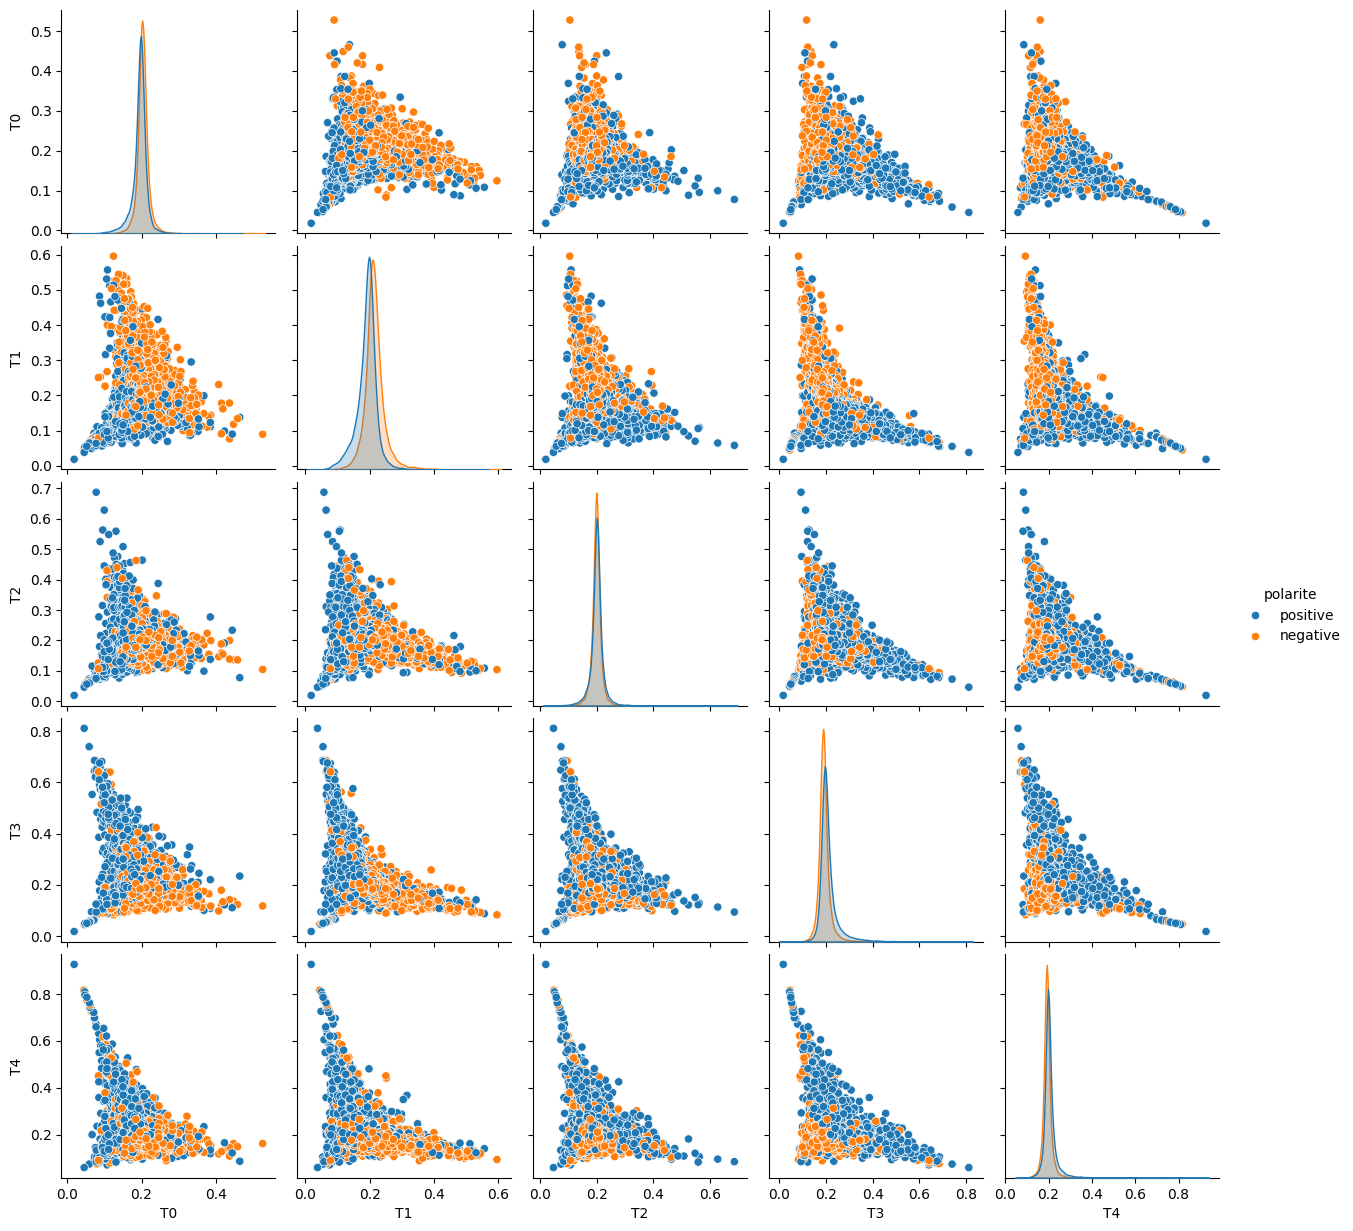

In [32]:
#Génération d'un graph pairplot par paire de variables (vérifier les discriminations)
import seaborn as sns
sns.pairplot(dfTopic, hue='polarite')